First, we load the data from the HDF5 files from the Food Image Dataset, and see how it is set up.

In [1]:
# Define the filenames for training data and test data
train_h5_path = "data/food41/food_c101_n10099_r64x64x3.h5"
test_h5_path = "data/food41/food_test_c101_n1000_r64x64x3.h5"

import h5py

# Then we read the files
f_train=h5py.File(train_h5_path,'r')
f_test=h5py.File(test_h5_path,'r')

# And see the keys located in the HDF5 files
print('Keys in Training Datafile =', list(f_train.keys()))
print('Keys in Test Datafile =', list(f_test.keys()))

Keys in Training Datafile = ['category', 'category_names', 'images']
Keys in Test Datafile = ['category', 'category_names', 'images']


We see that there are three keys in each file. Now we load each key into variables, and explore.

In [2]:
category_train = f_train['category'][()]
print('Type of category_train :',type(category_train))
print('Shape of category_train :',category_train.shape)
print('Type of category_train values :',category_train.dtype)

print()

category_names_train = f_train['category_names'][()]
print('Type of category_names_train :',type(category_names_train))
print('Shape of category_names_train :',category_names_train.shape)
print('Type of category_names_train values :',category_names_train.dtype)

print()

images_train = f_train['images'][()]
print('Type of images_train :',type(images_train))
print('Shape of images_train :',images_train.shape)
print('Type of images_train values :',images_train.dtype)

print()

category_test = f_test['category'][()]
print('Type of category_test :',type(category_test))
print('Shape of category_test :',category_test.shape)
print('Type of category_test values :',category_test.dtype)

print()

category_names_test = f_test['category_names'][()]
print('Type of category_names_test :',type(category_names_test))
print('Shape of category_names_test :',category_names_test.shape)
print('Type of category_names_test values :',category_names_test.dtype)

print()

images_test = f_test['images'][()]
print('Type of images_test :',type(images_test))
print('Shape of images_test :',images_test.shape)
print('Type of images_test values :',images_test.dtype)

Type of category_train : <class 'numpy.ndarray'>
Shape of category_train : (10099, 101)
Type of category_train values : bool

Type of category_names_train : <class 'numpy.ndarray'>
Shape of category_names_train : (101,)
Type of category_names_train values : |S40

Type of images_train : <class 'numpy.ndarray'>
Shape of images_train : (10099, 64, 64, 3)
Type of images_train values : uint8

Type of category_test : <class 'numpy.ndarray'>
Shape of category_test : (1000, 101)
Type of category_test values : bool

Type of category_names_test : <class 'numpy.ndarray'>
Shape of category_names_test : (101,)
Type of category_names_test values : |S40

Type of images_test : <class 'numpy.ndarray'>
Shape of images_test : (1000, 64, 64, 3)
Type of images_test values : uint8


The training data has 10099 instances while the test data contains 1000 instances. Now let's see whether we can show some images.

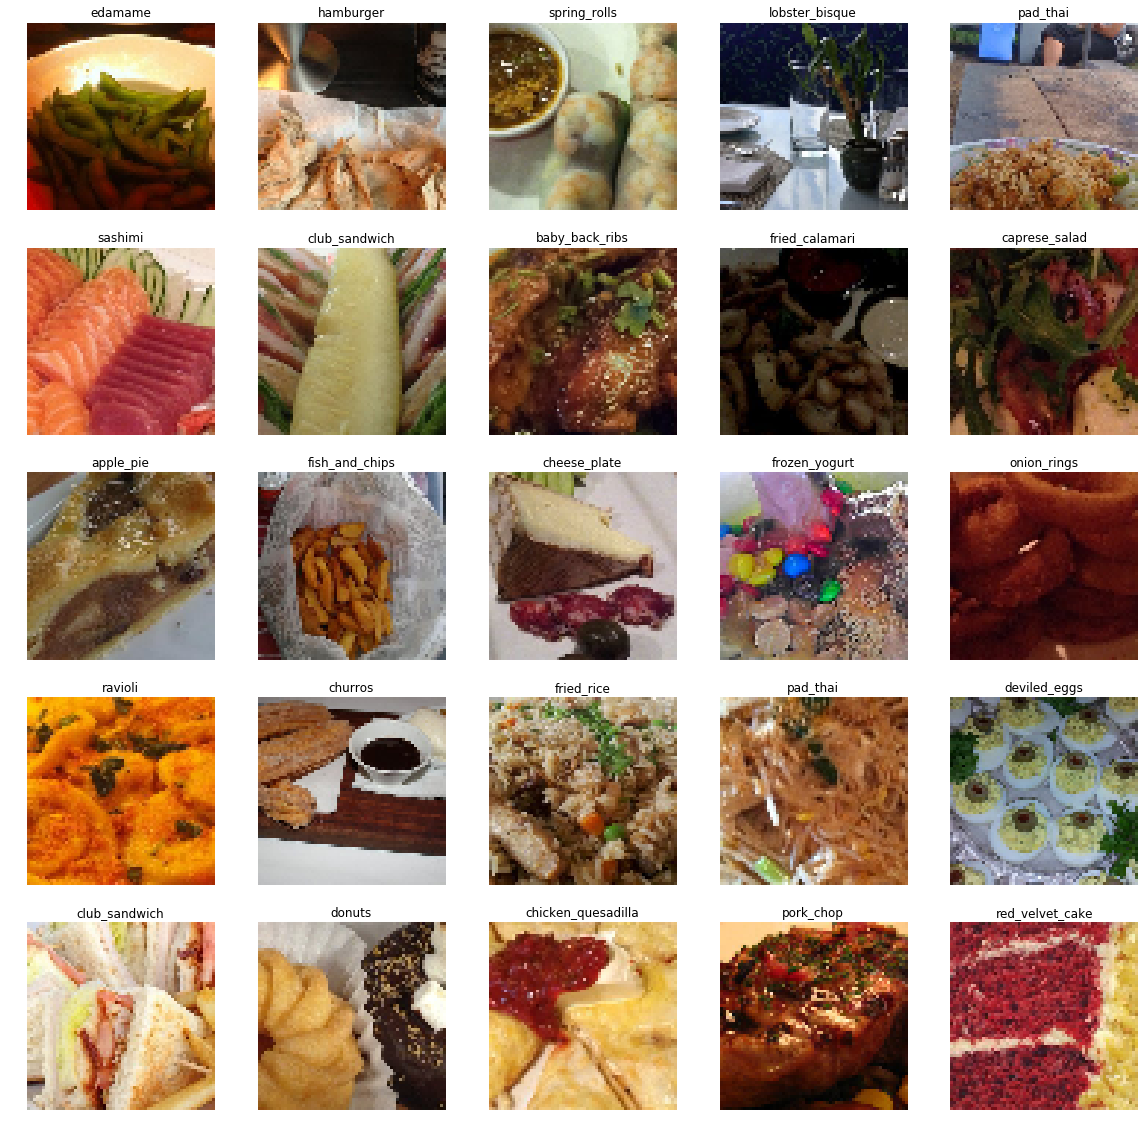

In [4]:
import matplotlib.pyplot as plt
import numpy as np

sample_imgs = 25

read_idxs = slice(0,sample_imgs)
im_data = images_train[read_idxs]
im_label = category_train[read_idxs]
label_names = [x.decode() for x in category_names_train]
fig, m_ax = plt.subplots(5, 5, figsize = (20, 20))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

The first 25 images of the training dataset is a mixture of different food type. Now let's see if we can show pictures of food that have the same labels.

In [5]:
print(np.argmax(category_train[5]))
print(category_names_train[86])

86
b'sashimi'


In [6]:
label = 86
subset_images = []
subset_labels = []
for index, category in enumerate(category_train):
    if category[label]:
        subset_images.append(images_train[index])
        subset_labels.append(category_train[index])
subset_images = np.array(subset_images)
subset_labels = np.array(subset_labels)
#print(subset_images.shape)
#print(subset_labels.shape)


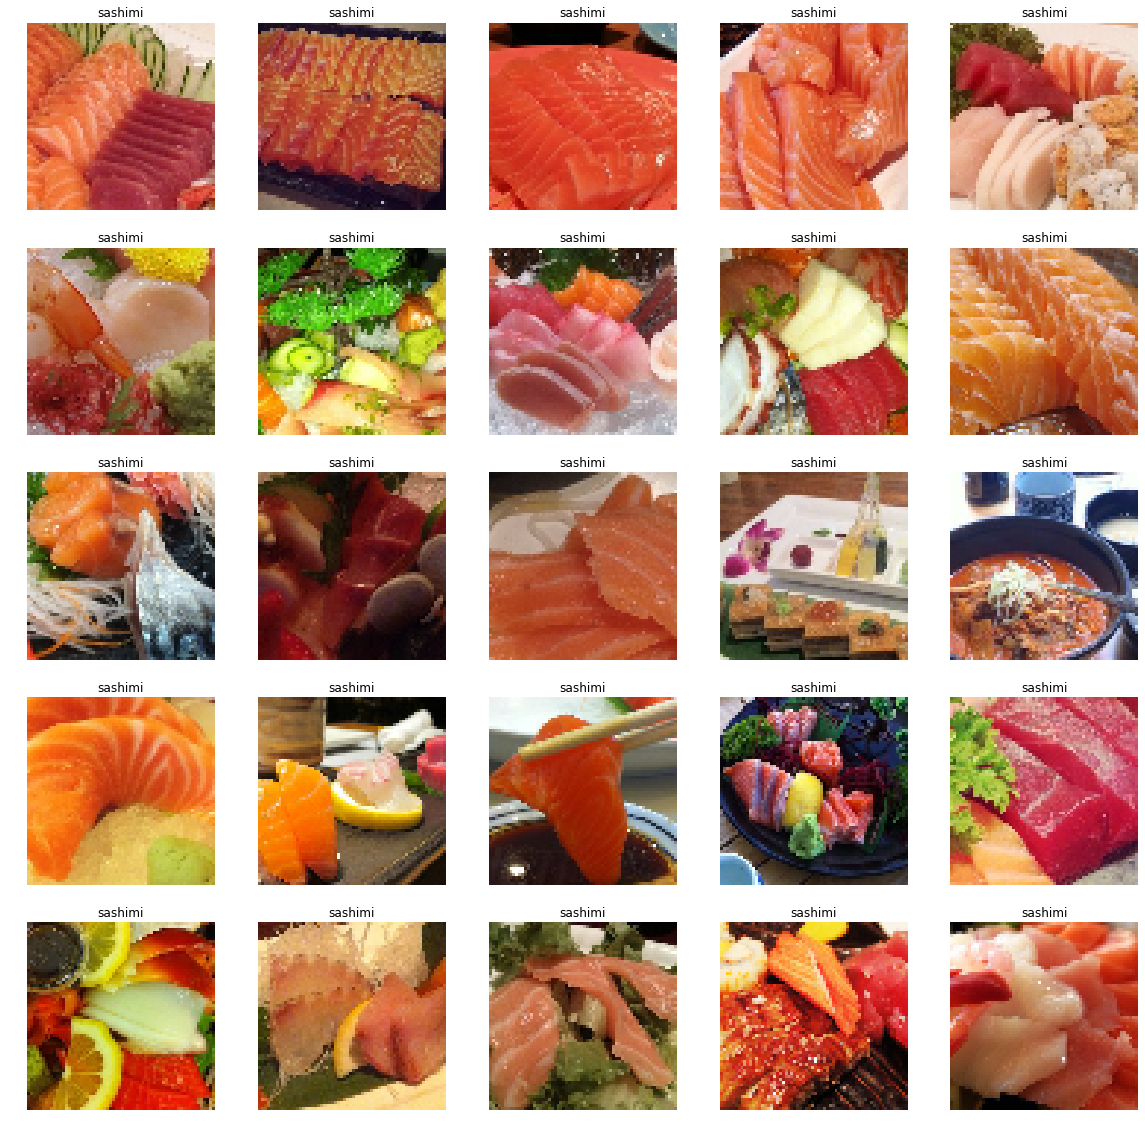

In [7]:
sample_imgs = 25

read_idxs = slice(0,sample_imgs)
im_data = subset_images[read_idxs]
im_label = subset_labels[read_idxs]
label_names = [x.decode() for x in category_names_train]
fig, m_ax = plt.subplots(5, 5, figsize = (20, 20))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

Above, we can see the first 25 images that has the label 'sashimi'.

In [8]:
print(np.argmax(category_train[24]))
print(category_names_train[83])

83
b'red_velvet_cake'


In [9]:
label = 83
subset_images = []
subset_labels = []
for index, category in enumerate(category_train):
    if category[label]:
        subset_images.append(images_train[index])
        subset_labels.append(category_train[index])
subset_images = np.array(subset_images)
subset_labels = np.array(subset_labels)
#print(subset_images.shape)
#print(subset_labels.shape)

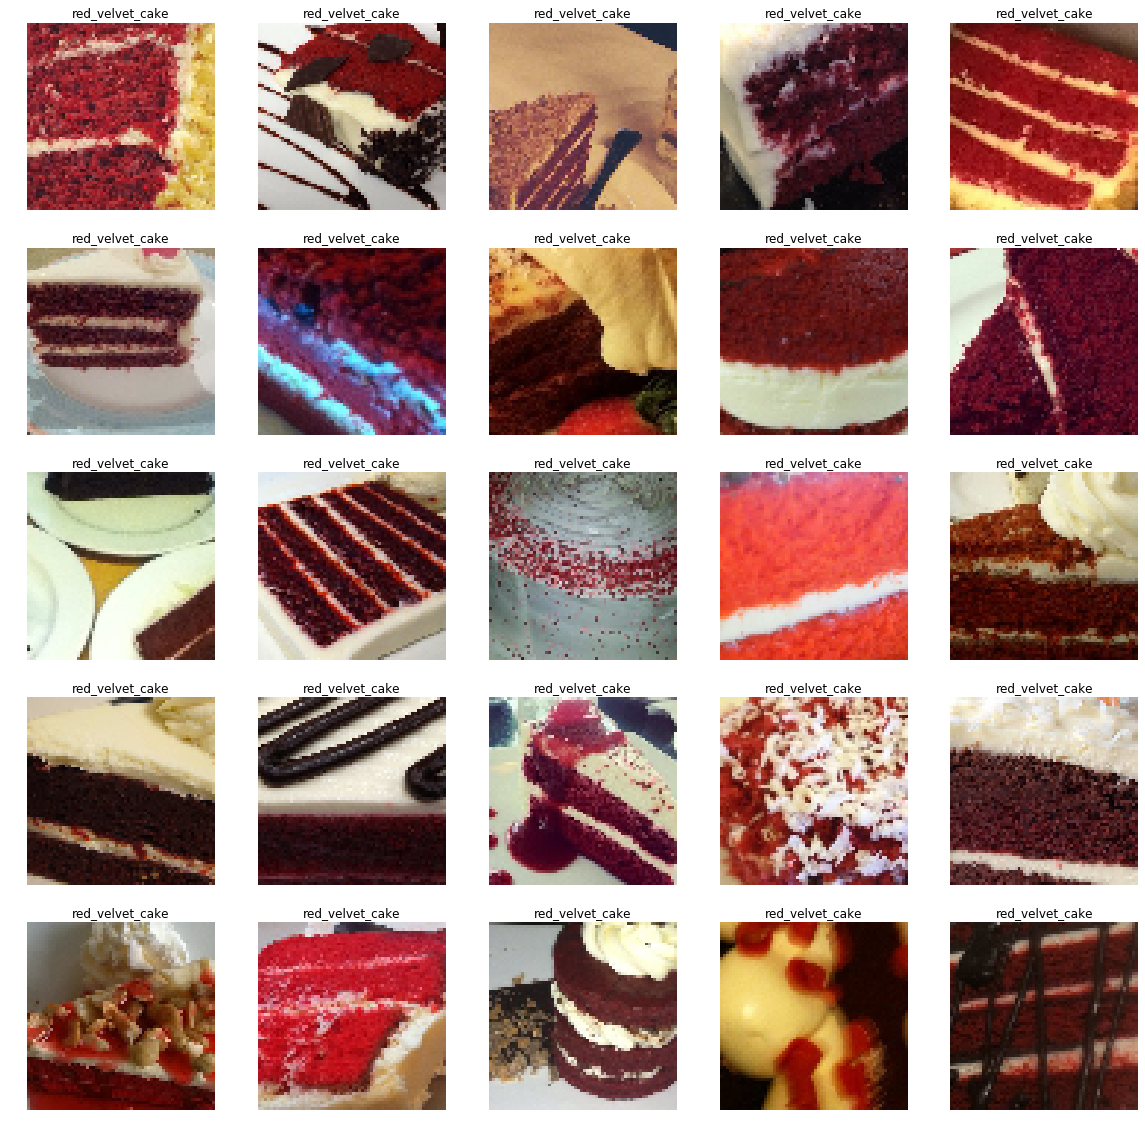

In [10]:
sample_imgs = 25

read_idxs = slice(0,sample_imgs)
im_data = subset_images[read_idxs]
im_label = subset_labels[read_idxs]
label_names = [x.decode() for x in category_names_train]
fig, m_ax = plt.subplots(5, 5, figsize = (20, 20))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

Now we use a trained convolution network to train our data.

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split

#X_train = images_train
#y_train = category_train
#X_test = images_test
#y_test = category_test

X_train, X_test, y_train, y_test = train_test_split(images_train, category_train, 
                                                    test_size = 0.2, random_state=42, stratify=category_train)

#model = Sequential()

#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=X_train.shape[1:],
#                 activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(y_test.shape[1], activation='softmax'))

In [52]:
#mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:], pooling='avg')
#resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:],)

for layer in resnet_base_model.layers:
    layer.trainable=False

In [53]:
model = Sequential()

model.add(resnet_base_model)
#model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_test.shape[1], activation='softmax'))

In [54]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 101)               6565      
Total params: 24,676,197
Trainable params: 1,088,485
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [55]:
from keras.optimizers import Adam, rmsprop

opt = Adam(lr=0.0001)
#opt = rmsprop(lr=0.0001, decay=1e-6)

# Compile model
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
training = model.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
#                     epochs=100, batch_size=256, shuffle="batch")
                     epochs=100)


Train on 8079 samples, validate on 2020 samples
Epoch 1/100
8079/8079 [==============================] - 78s 10ms/step - loss: 4.6181 - acc: 0.0205 - val_loss: 4.7447 - val_acc: 0.0262
Epoch 2/100
8079/8079 [==============================] - 55s 7ms/step - loss: 4.4070 - acc: 0.0557 - val_loss: 4.9129 - val_acc: 0.0411s: 4.4174 - acc: - ETA: 3s - loss: 4.
Epoch 3/100
8079/8079 [==============================] - 55s 7ms/step - loss: 4.1319 - acc: 0.1045 - val_loss: 5.2137 - val_acc: 0.0431
Epoch 4/100
8079/8079 [==============================] - 55s 7ms/step - loss: 3.8131 - acc: 0.1577 - val_loss: 5.5705 - val_acc: 0.0490
Epoch 5/100
8079/8079 [==============================] - 55s 7ms/step - loss: 3.4818 - acc: 0.2162 - val_loss: 5.6537 - val_acc: 0.0525
Epoch 6/100
8079/8079 [==============================] - 55s 7ms/step - loss: 3.2045 - acc: 0.2623 - val_loss: 6.1772 - val_acc: 0.0525
Epoch 7/100
8079/8079 [==============================] - 55s 7ms/step - loss: 2.9757 - acc: 0.3078

8079/8079 [==============================] - 55s 7ms/step - loss: 0.3152 - acc: 0.9337 - val_loss: 9.5493 - val_acc: 0.0777
Epoch 60/100
8079/8079 [==============================] - 55s 7ms/step - loss: 0.3127 - acc: 0.9324 - val_loss: 9.6263 - val_acc: 0.0807
Epoch 61/100
8079/8079 [==============================] - 57s 7ms/step - loss: 0.2999 - acc: 0.9365 - val_loss: 9.7684 - val_acc: 0.0728
Epoch 62/100
8079/8079 [==============================] - 55s 7ms/step - loss: 0.2899 - acc: 0.9395 - val_loss: 9.9327 - val_acc: 0.0772
Epoch 63/100
8079/8079 [==============================] - 55s 7ms/step - loss: 0.2766 - acc: 0.9410 - val_loss: 9.8773 - val_acc: 0.0792
Epoch 64/100
8079/8079 [==============================] - 55s 7ms/step - loss: 0.2668 - acc: 0.9449 - val_loss: 9.8063 - val_acc: 0.0757
Epoch 65/100
8079/8079 [==============================] - 56s 7ms/step - loss: 0.2770 - acc: 0.9419 - val_loss: 9.6078 - val_acc: 0.0856
Epoch 66/100
8079/8079 [==============================

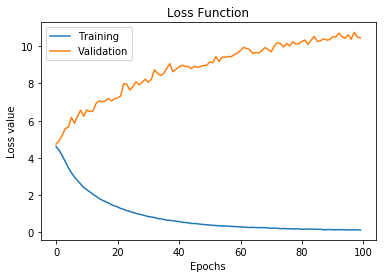

In [56]:
# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss Function')
plt.legend(['Training','Validation'])
# Show the figure
plt.show()

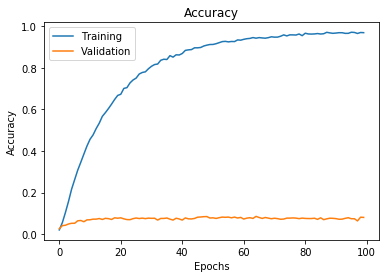

In [57]:
# Plot the training accuracy 
plt.plot(history['acc'])
# Plot the validation accuracy
plt.plot(history['val_acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training','Validation'])
# Show the figure
plt.show()